<h1 align="center">Volume 1: Facial Recognition</h1>

    Austin Ahlstrom
    Math 345 Sec 002
    2017-12-02 (Sat)

In [1]:
import numpy as np
import random
import scipy.linalg as la
from os import walk
from imageio import imread

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, flatten=True))

## Problem 1 

- Implement the `show()` function.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plots the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #original_image = np.reshape(image, (m,n))
    #print(np.shape(original_image))
    plt.axis("off")
    plt.imshow(np.reshape(image, (m,n)), cmap="gray")

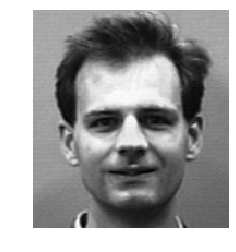

In [4]:
# Show a face from the faces94 dataset.
F = get_faces()
show(random.choice(F.T))

## Facial Recognition Class

In [13]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn, k) ndarray): A matrix with k columns, each containing
                a flattened image of dimension m by n
        mean_face ((mn,) ndarray): the mean face of F
        shifted_F ((mn, k) ndarray): F as mean-shifted by the mean face
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize all attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path)
        self.mean_face = self.F.mean(1)
        self.shifted_F = self.F - self.mean_face[:, np.newaxis]
        self.U, S, V = np.linalg.svd(self.shifted_F, False)

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        print('self.U', (self.U).shape)
        print('self.U[:,:s]', (self.U[:,:s]).shape)
        print('self.U[:,:s].T', (self.U[:,:s].T).shape)
        return np.dot(self.U[:,:s].T, A)

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        return np.argmin(la.norm(self.project(self.shifted_F, s) - 
                self.project(g-self.mean_face, s)[:, np.newaxis], axis=0))

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        plt.subplot(121).axis("off")
        plt.subplot(122).axis("off")
        plt.subplot(121).imshow(np.reshape(image, (m,n)), cmap="gray")
        plt.subplot(122).imshow(np.reshape(
                self.F.T[self.find_nearest(image, s)], (m,n)), cmap="gray")
        plt.subplot(121).set_title("Original image")
        plt.subplot(122).set_title("Matched image")
        plt.show()

## Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

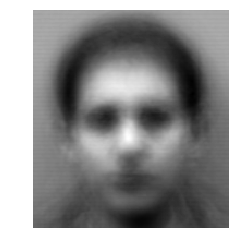

In [6]:
# Display the mean face.
show(FacialRec().mean_face)

/home/JCPriceLab/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


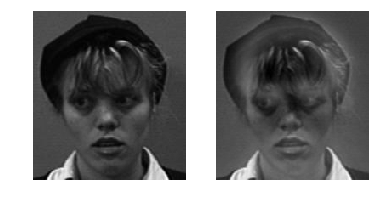

In [7]:
# Display an image along with its mean-shifted face.
f_rec = FacialRec()
index = random.randint(0, len(f_rec.F.T)-1)
plt.subplot(121).axis("off")
plt.subplot(122).axis("off")
plt.subplot(121).imshow(np.reshape(f_rec.F.T[index], (200,180)),
                        cmap="gray")
plt.subplot(122).imshow(np.reshape(f_rec.shifted_F.T[index],
                        (200,180)), cmap="gray")
plt.show()

## Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


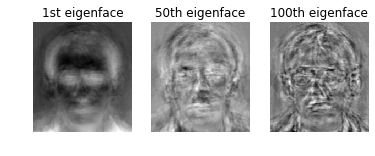

In [14]:
# Display some of the eigenfaces.
f_rec = FacialRec()
face = random.choice(f_rec.F.T)
plt.subplot(131).axis("off")
plt.subplot(132).axis("off")
plt.subplot(133).axis("off")
plt.subplot(131).imshow(np.reshape(f_rec.U.T[0], (200,180)),
                        cmap="gray")
plt.subplot(132).imshow(np.reshape(f_rec.U.T[49], (200,180)),
                        cmap="gray")
plt.subplot(133).imshow(np.reshape(f_rec.U.T[99], (200,180)),
                        cmap="gray")
plt.subplot(131).set_title("1st eigenface")
plt.subplot(132).set_title("50th eigenface")
plt.subplot(133).set_title("100th eigenface")
plt.show()

## Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

(36000,)
self.U (36000, 153)
self.U[:,:s] (36000, 10)
self.U[:,:s].T (10, 36000)
self.U (36000, 153)
self.U[:,:s] (36000, 30)
self.U[:,:s].T (30, 36000)
self.U (36000, 153)
self.U[:,:s] (36000, 50)
self.U[:,:s].T (50, 36000)
self.U (36000, 153)
self.U[:,:s] (36000, 70)
self.U[:,:s].T (70, 36000)


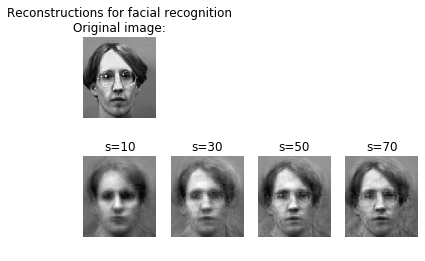

In [16]:
# Display a face image reconstructed with various numbers of eigenfaces. 
f_rec = FacialRec()
index = random.randint(0, len(f_rec.F.T))
face = f_rec.shifted_F.T[index]
print(face.shape)
plt.subplot(241).axis("off")
plt.subplot(245).axis("off")
plt.subplot(246).axis("off")
plt.subplot(247).axis("off")
plt.subplot(248).axis("off")
plt.subplot(241).imshow(np.reshape(f_rec.F.T[index],(200,180)), cmap="gray")
plt.subplot(245).imshow(
        np.reshape(f_rec.U[:,:10]@f_rec.project(face,10) + f_rec.mean_face,
        (200,180)), cmap="gray")
plt.subplot(246).imshow(
        np.reshape(f_rec.U[:,:30]@f_rec.project(face,30) + f_rec.mean_face,
        (200,180)), cmap="gray")
plt.subplot(247).imshow(
        np.reshape(f_rec.U[:,:50]@f_rec.project(face,50) + f_rec.mean_face,
        (200,180)), cmap="gray")
plt.subplot(248).imshow(
        np.reshape(f_rec.U[:,:70]@f_rec.project(face,70) + f_rec.mean_face,
        (200,180)), cmap="gray")
plt.subplot(241).set_title("Reconstructions for facial recognition\n"
                          "Original image:")
plt.subplot(245).set_title("s=10")
plt.subplot(246).set_title("s=30")
plt.subplot(247).set_title("s=50")
plt.subplot(248).set_title("s=70")
plt.show()

## Problem 5 
Implement `FacialRec.find_nearest()`.

## Problem 6

- Implement `FacialRec.match_face()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match_faces()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

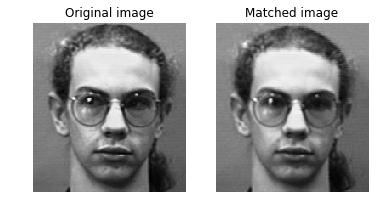

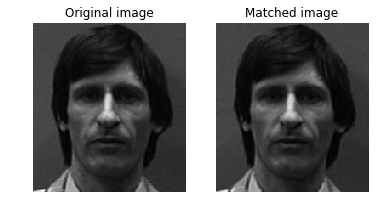

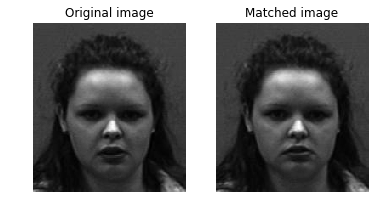

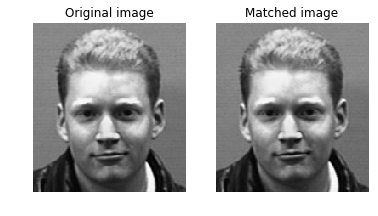

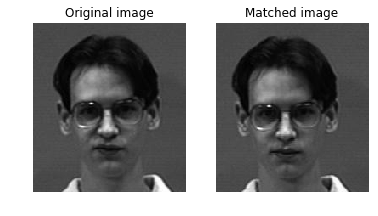

In [178]:
# Display some random images along with their closest match.
f_rec = FacialRec()
for test_image in sample_faces(5):
    f_rec.match(test_image)